# draw networks

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

plt.style.use('ggplot')

def calculate_graph_inf(graph):
    graph.name = filename
    info = nx.info(graph)
    print info
    #plt.figure(figsize=(10,10))
    #nx.draw_spring(graph, arrows=True, with_labels=True)
    
def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

def drawIt(graph, what = 'graph'):
    nsize = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what, nsize)
    if nsize > 20:
        plt.figure(figsize=(10, 10))
        if nsize > 40:
            nx.draw_spring(graph, with_labels = True, node_size = 70, font_size = 12)
        else:
            nx.draw_spring(graph, with_labels = True)
    else:
        nx.draw_spring(graph, with_labels = True)
    plt.show()

# draw full graph
def describeGraph(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))   
    params = (graph.number_of_edges(), graph.number_of_nodes(), len(cc))
    print "Graph has %s edges, %s nodes, and %s connected components\n" % params
    drawIt(graph)
    #for sub in components:
    #    drawIt(graph.subgraph(sub), what = 'component')

# draw all components
def describeComp(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))
    print "Graph has %s connected components\n" % len(cc)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')

# draw greatest component
def drawGc(graph):
    Gc = max(nx.connected_component_subgraphs(graph), key=len)
    nsize = Gc.number_of_nodes()
    print "Greatest component has %s nodes\n" % nsize
    drawIt(Gc, what = 'Gc')
    
# draw largest components
def drawComp(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))
    print "Component graphs 5 out of %s\n" % len(cc)
    for i, sub in enumerate(components):
        drawIt(graph.subgraph(sub), what = 'component')
        if i == 4:
            break

In [2]:
# start here

graph_pos = nx.read_gml('../output/network/article_pos1.gml')
ugraph_pos = graph_pos.to_undirected()
U = graph_pos.to_undirected(reciprocal=True)
e = U.edges()
ugraph_pos.add_edges_from(e)

graph_neg = nx.read_gml('../output/network/article_neg1.gml')
ugraph_neg = graph_neg.to_undirected()
U = graph_neg.to_undirected(reciprocal=True)
e = U.edges()
ugraph_neg.add_edges_from(e)

graph_neu = nx.read_gml('../output/network/article_neu1.gml')
ugraph_neu = graph_neu.to_undirected()
U = graph_neu.to_undirected(reciprocal=True)
e = U.edges()
ugraph_neu.add_edges_from(e)

- - -
# positive

Positive
Graph has 1140 edges, 652 nodes, and 21 connected components

Drawing graph of size 652:


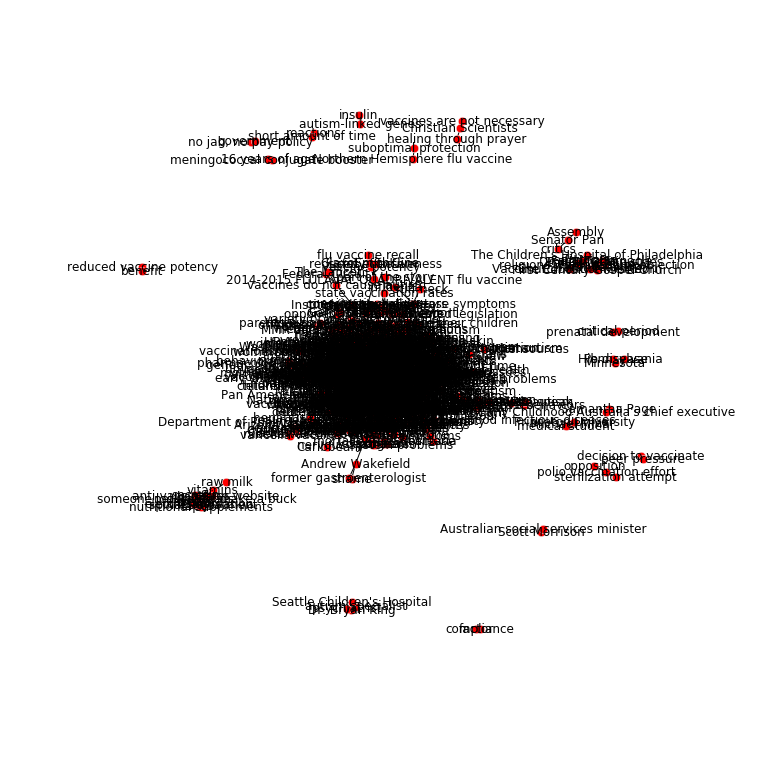

Component graphs 5 out of 21

Drawing component of size 585:


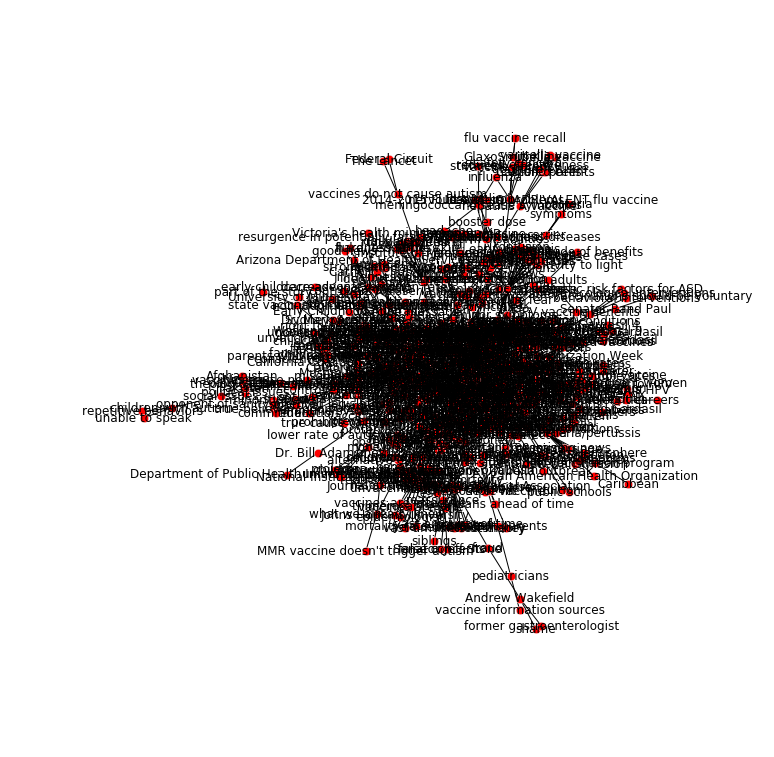

Drawing component of size 15:


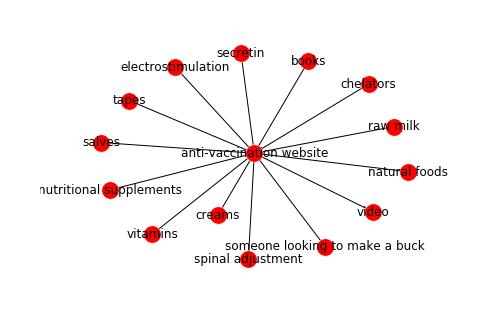

Drawing component of size 7:


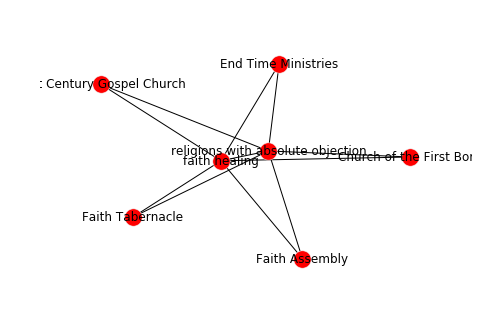

Drawing component of size 4:


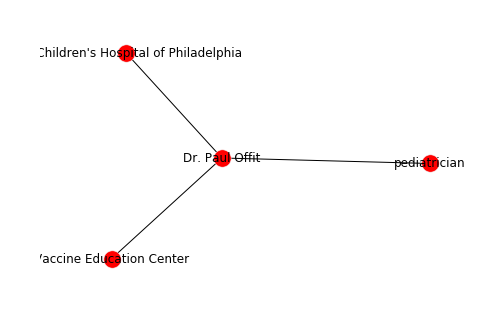

Drawing component of size 4:


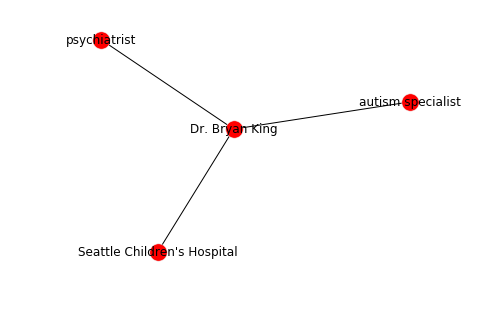

Connected components by size = [585, 15, 7, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Greatest component size = 585
Total # of cutsets = 122
Min node cut = set([u'vaccine message'])
Min edge cut = set([(u'anti-vaccination', u'time')])
(u'anti-vaccination', u'time') should stop spending


In [4]:
print "Positive"
describeGraph(ugraph_pos)
#describeComp(ugraph_pos)
#drawGc(ugraph_pos)
drawComp(ugraph_pos)
# save

# components, subgraphs, Gc, node cuts
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph_pos), key=len, reverse=True)]
subgraphs = list(nx.connected_component_subgraphs(ugraph_pos))
Gc = max(nx.connected_component_subgraphs(ugraph_pos), key=len)
cutsets = list(nx.all_node_cuts(Gc))
min_ncut = nx.minimum_node_cut(Gc)
min_ecut = nx.minimum_edge_cut(Gc)

print "Connected components by size = %s" % connected_components
print "Greatest component size = %s" % len(Gc)
print "Total # of cutsets = %s" % len(cutsets)
print "Min node cut =", min_ncut
print "Min edge cut =", min_ecut

# read edge labels in min cut for Gc
# change source and target
#a = nx.minimum_edge_cut(Gc, s='vaccines', t='autism')

# min_ecut = nx.minimum_edge_cut(Gc)
labels = nx.get_edge_attributes(Gc,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in min_ecut:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

- - -
# negative

Negative
Graph has 1898 edges, 1257 nodes, and 49 connected components

Drawing graph of size 1257:


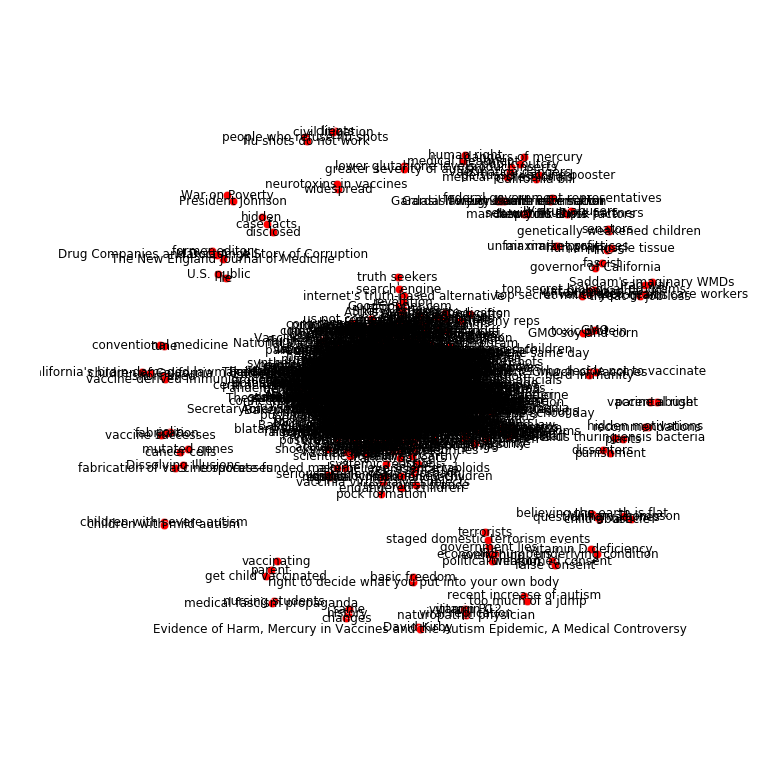

Component graphs 5 out of 49

Drawing component of size 1140:


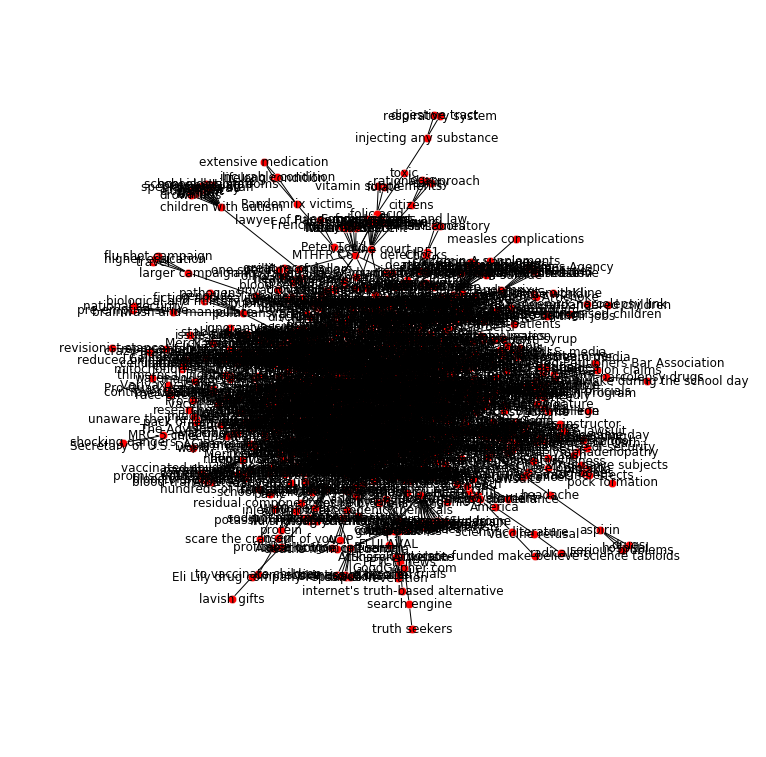

Drawing component of size 7:


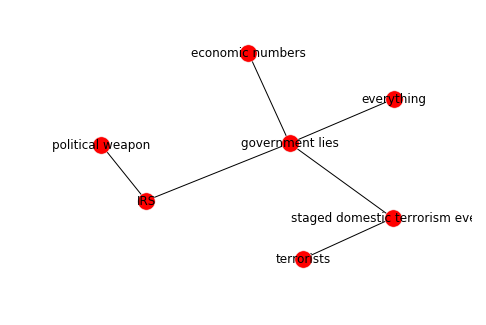

Drawing component of size 4:


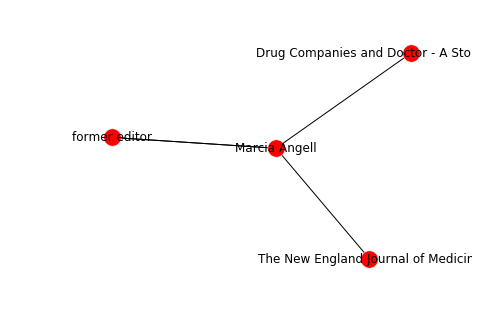

Drawing component of size 4:


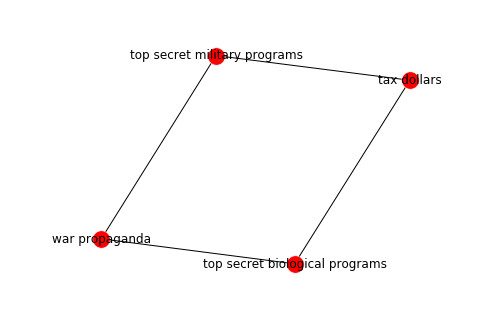

Drawing component of size 4:


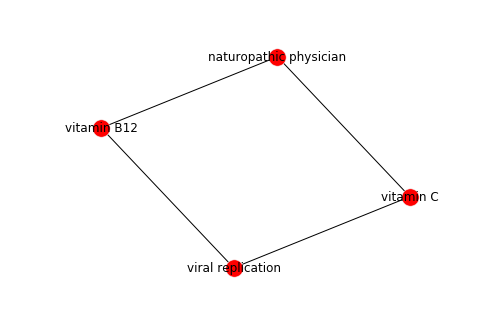

Connected components by size = [1140, 7, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Greatest component size = 1140
Total # of cutsets = 226
Min node cut = set([u'United States'])
Min edge cut = set([(u'influenza', u'childhood diseases')])
(u'influenza', u'childhood diseases') is most common


In [5]:
print "Negative"
describeGraph(ugraph_neg)
#describeComp(ugraph_neg)
#drawGc(ugraph_neg)
drawComp(ugraph_neg)
# save

# components, subgraphs, Gc, node cuts
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph_neg), key=len, reverse=True)]
subgraphs = list(nx.connected_component_subgraphs(ugraph_neg))
Gc = max(nx.connected_component_subgraphs(ugraph_neg), key=len)
cutsets = list(nx.all_node_cuts(Gc))
min_ncut = nx.minimum_node_cut(Gc)
min_ecut = nx.minimum_edge_cut(Gc)

print "Connected components by size = %s" % connected_components
print "Greatest component size = %s" % len(Gc)
print "Total # of cutsets = %s" % len(cutsets)
print "Min node cut =", min_ncut
print "Min edge cut =", min_ecut

# read edge labels in min cut for Gc
# change source and target
#a = nx.minimum_edge_cut(Gc, s='vaccines', t='autism')

# min_ecut = nx.minimum_edge_cut(Gc)
labels = nx.get_edge_attributes(Gc,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in min_ecut:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

- - -
# neutral

Neutral
Graph has 241 edges, 201 nodes, and 12 connected components

Drawing graph of size 201:


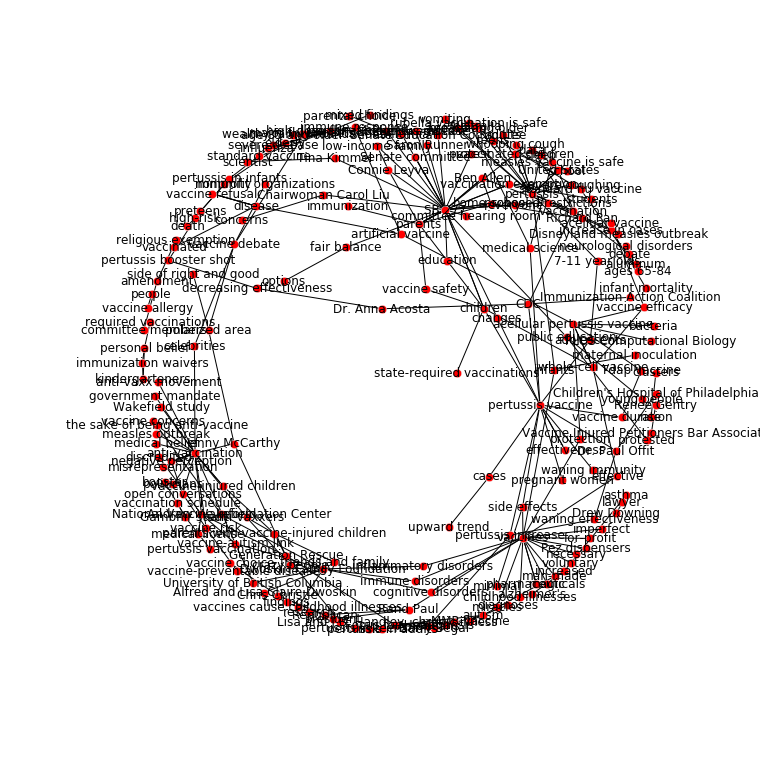

Component graphs 5 out of 12

Drawing component of size 171:


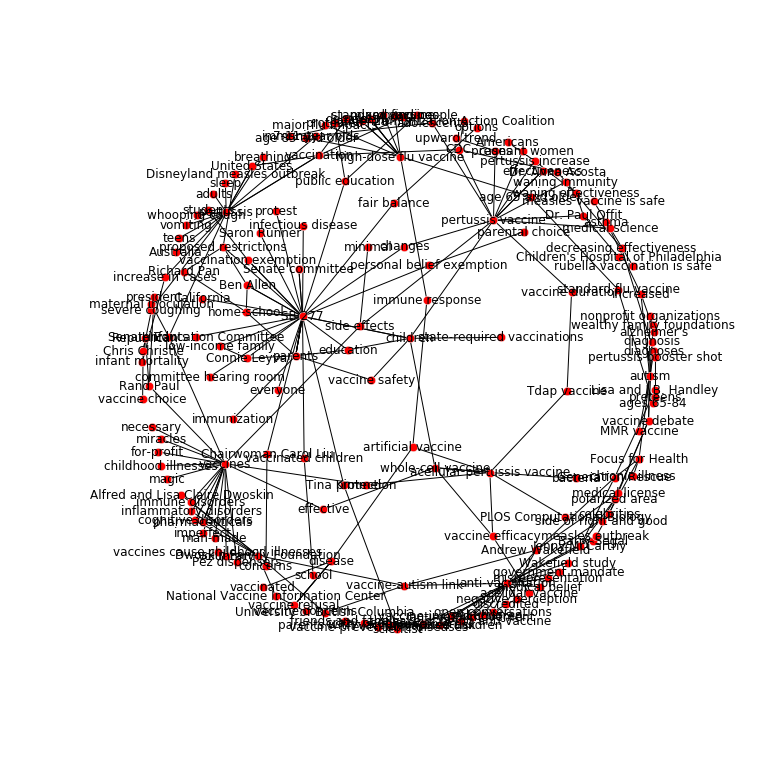

Drawing component of size 4:


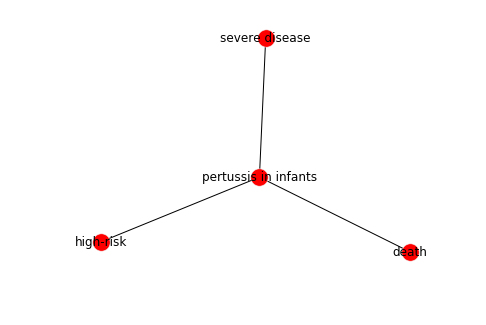

Drawing component of size 4:


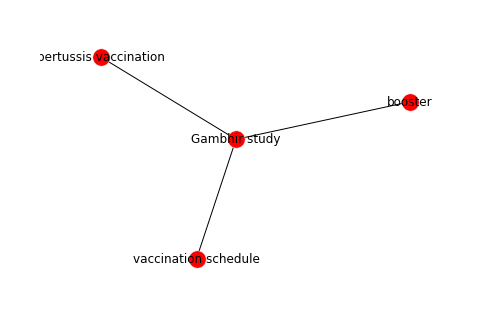

Drawing component of size 4:


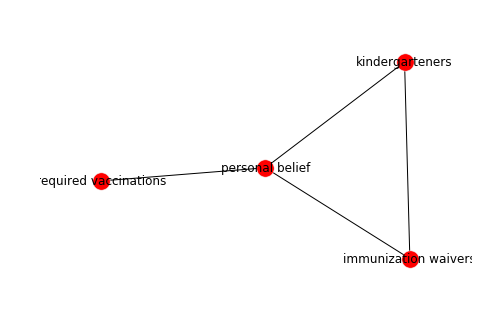

Drawing component of size 3:


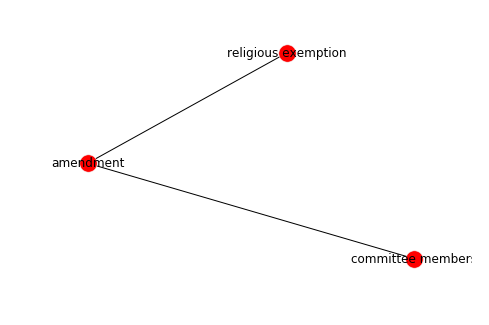

Connected components by size = [171, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2]
Greatest component size = 171
Total # of cutsets = 41
Min node cut = set([u'anti-vaccination'])
Min edge cut = set([(u'CDC', u'Dr. Anna Acosta')])
(u'Dr. Anna Acosta', u'CDC') study findings published online May 4 in journal Pediatrics, is an epidemiologist


In [6]:
print "Neutral"
describeGraph(ugraph_neu)
#describeComp(ugraph_neu)
#drawGc(ugraph_neu)
drawComp(ugraph_neu)
# save

# components, subgraphs, Gc, node cuts
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph_neu), key=len, reverse=True)]
subgraphs = list(nx.connected_component_subgraphs(ugraph_neu))
Gc = max(nx.connected_component_subgraphs(ugraph_neu), key=len)
cutsets = list(nx.all_node_cuts(Gc))
min_ncut = nx.minimum_node_cut(Gc)
min_ecut = nx.minimum_edge_cut(Gc)
print "Connected components by size = %s" % connected_components
print "Greatest component size = %s" % len(Gc)
print "Total # of cutsets = %s" % len(cutsets)
print "Min node cut =", min_ncut
print "Min edge cut =", min_ecut

# read edge labels in min cut for Gc
# change source and target
#a = nx.minimum_edge_cut(Gc, s='vaccines', t='autism')

# min_ecut = nx.minimum_edge_cut(Gc)
labels = nx.get_edge_attributes(Gc,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in min_ecut:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

- - -
### Components

In [ ]:
# components, subgraphs, Gc, node cuts
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph_neu), key=len, reverse=True)]
subgraphs = list(nx.connected_component_subgraphs(ugraph_neu))
Gc = max(nx.connected_component_subgraphs(ugraph_neu), key=len)
cutsets = list(nx.all_node_cuts(Gc))
min_ncut = nx.minimum_node_cut(Gc)
min_ecut = nx.minimum_edge_cut(Gc)

print "Connected components by size = %s" % connected_components
print "Greatest component size = %s" % len(Gc)
print "Total # of cutsets = %s" % len(cutsets)
print "Min node cut =", min_ncut
print "Min edge cut =", min_ecut

In [ ]:
# read edge labels in min cut for Gc
# change source and target
#a = nx.minimum_edge_cut(Gc, s='vaccines', t='autism')

# min_ecut = nx.minimum_edge_cut(Gc)
labels = nx.get_edge_attributes(Gc,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in min_ecut:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

### Connectivity

### Degree

In [ ]:
# degree histogram: returns a list of frequencies of degrees
print nx.degree_histogram(graph)

In [ ]:
# degree rank plot (undirected)

degree_sequence=sorted(nx.degree(ugraph).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(ugraph), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.show()

### Centrality

In [ ]:
# degree centrality
a = nx.degree_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['degree centrality']
dfIn = dfIn.sort_values(by=['degree centrality'])
dfIn

In [ ]:
# betweenness centrality
a = nx.betweenness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['betweenness centrality']
dfIn = dfIn.sort_values(by=['betweenness centrality'])
dfIn

In [ ]:
# closeness centrality
a = nx.closeness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['closeness centrality']
dfIn = dfIn.sort_values(by=['closeness centrality'])
dfIn

In [ ]:
# in degree centrality
a = nx.in_degree_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['in deg centrality']
dfIn = dfIn.sort_values(by=['in deg centrality'])
dfIn

In [ ]:
# out degree centrality
b = nx.out_degree_centrality(graph)
dfIn=pd.DataFrame.from_dict(b,orient='index')
dfIn.columns = ['out deg centrality']
dfIn = dfIn.sort_values(by=['out deg centrality'])
dfIn

- - -